In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.preprocessing import MinMaxScaler
from collections import Counter

In [31]:
df = pd.read_csv('./adult.data', sep=", ", header=None)
df.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", \
              "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary-range"]

# df = df[df["workclass"] != '?']
# df = df[df["education"] != '?']
# df = df[df["marital-status"] != '?']
# df = df[df["occupation"] != '?']
# df = df[df["relationship"] != '?']
# df = df[df["race"] != '?']
# df = df[df["sex"] != '?']
# df = df[df["native-country"] != '?']

lower_range = df[df["salary-range"] == "<=50K"].sample(n=7841)
upper_range = df[df["salary-range"] == ">50K"]

df = pd.concat([upper_range, lower_range])
df['range'] = (df["salary-range"] == ">50K")*1

df.head()

C:\Users\Abhilash\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-range,range
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,1
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K,1
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K,1


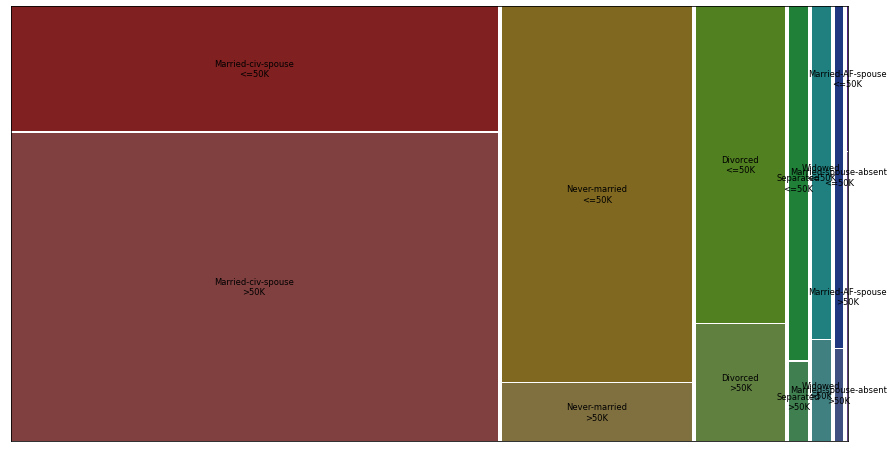

In [21]:
plt.close()
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,8))
fig.subplots_adjust(hspace=.5)
mosaic(df, ['marital-status', 'salary-range'], ax=axes, axes_label=False)
plt.show()

In [27]:
def plot_class(col1, col2, col3):
    plt.close()
    cols = [col1, col2, col3]
    print("col vs col")
    for i in range(3):
        for j in range(i+1, 3):
            print("For Salary <=50K")
            print(str(cols[i]) + " and " + cols[j])
            fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,10))
            fig.subplots_adjust(hspace=.5)
            mosaic(lower_range, [cols[i], cols[j]], ax=axes, axes_label=False)
            plt.show()
            print("For Salary >50K")
            print(str(cols[i]) + " and " + cols[j])
            fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,10))
            fig.subplots_adjust(hspace=.5)
            mosaic(upper_range, [cols[i], cols[j]], ax=axes, axes_label=False)
            plt.show()
    print("with Range")
    for i in range(3):
        print("Salary <=50K")
        print(cols[i])
        fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,10))
        fig.subplots_adjust(hspace=.5)
        mosaic(lower_range, [cols[i]], ax=axes, axes_label=False)
        plt.show()
        print("Salary >50K")
        print(cols[i])
        fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,10))
        fig.subplots_adjust(hspace=.5)
        mosaic(upper_range, [cols[i]], ax=axes, axes_label=False)
        plt.show()
    print("All Sal")
    for i in range(3):
        fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,10))
        fig.subplots_adjust(hspace=.5)
        mosaic(df, [cols[i], 'salary-range'], ax=axes, axes_label=False)
        plt.show()

col vs col
For Salary <=50K
education and marital-status


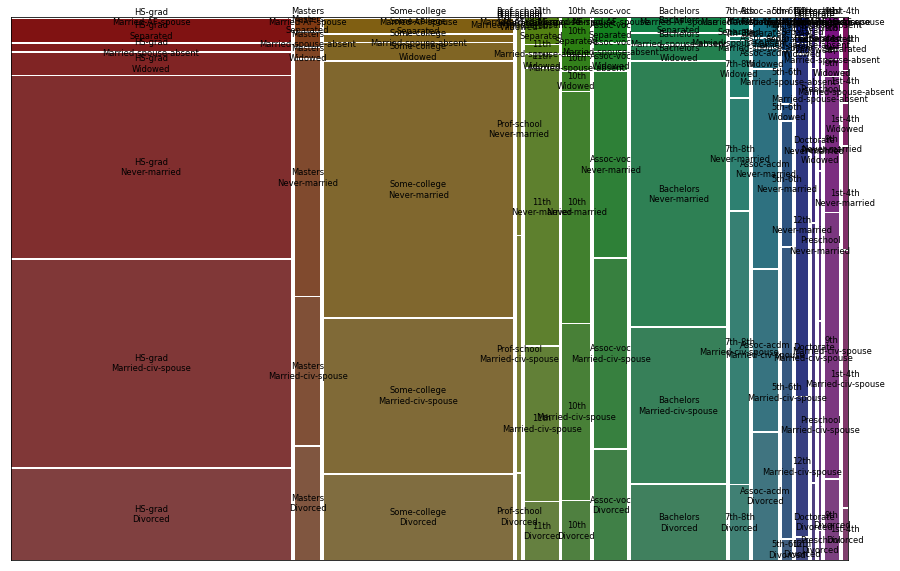

For Salary >50K
education and marital-status


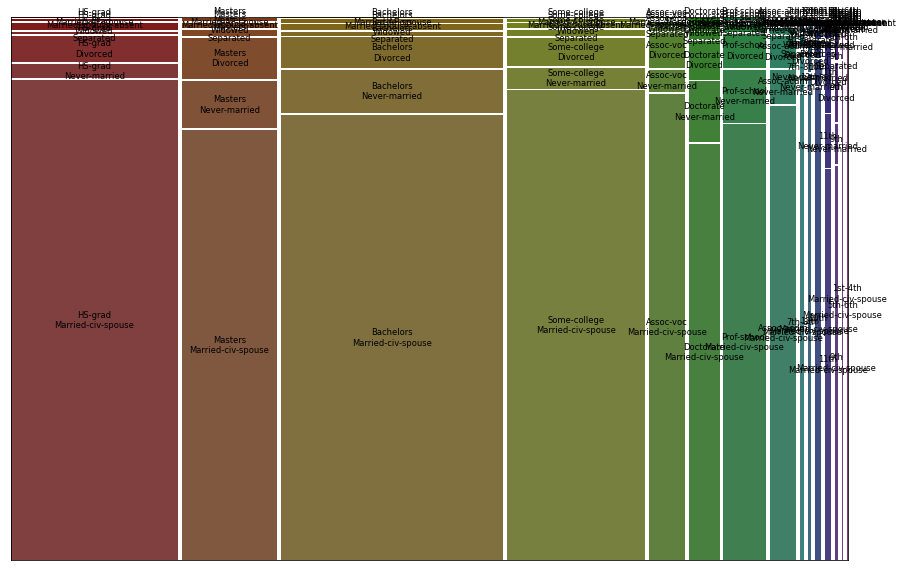

For Salary <=50K
education and occupation


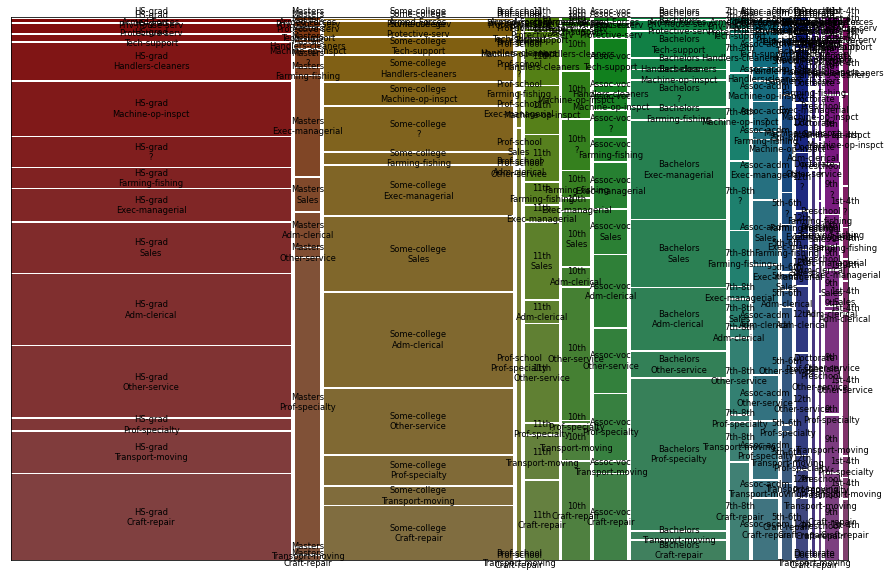

For Salary >50K
education and occupation


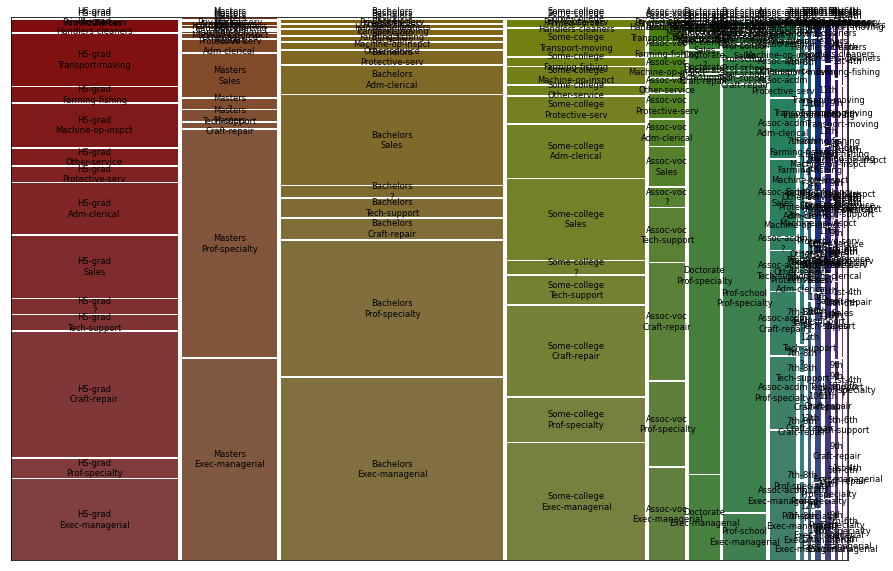

For Salary <=50K
marital-status and occupation


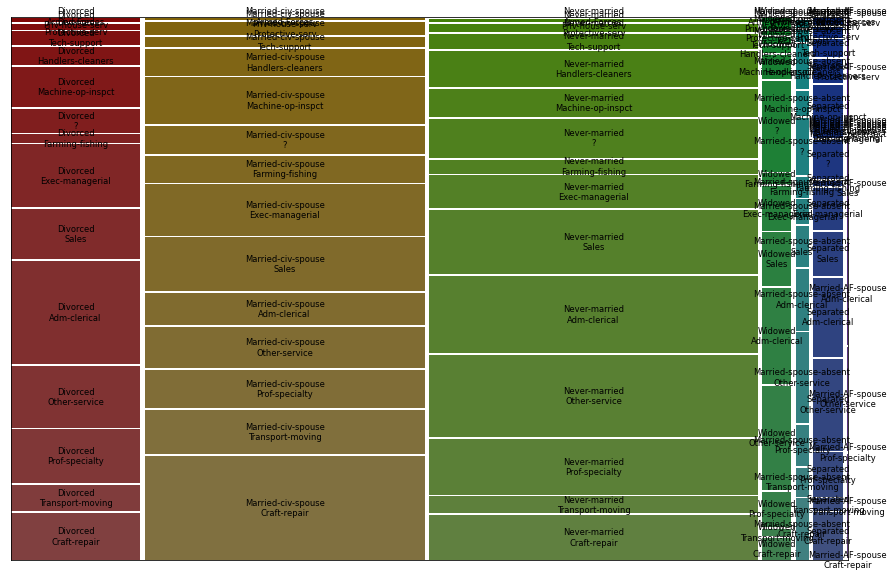

For Salary >50K
marital-status and occupation


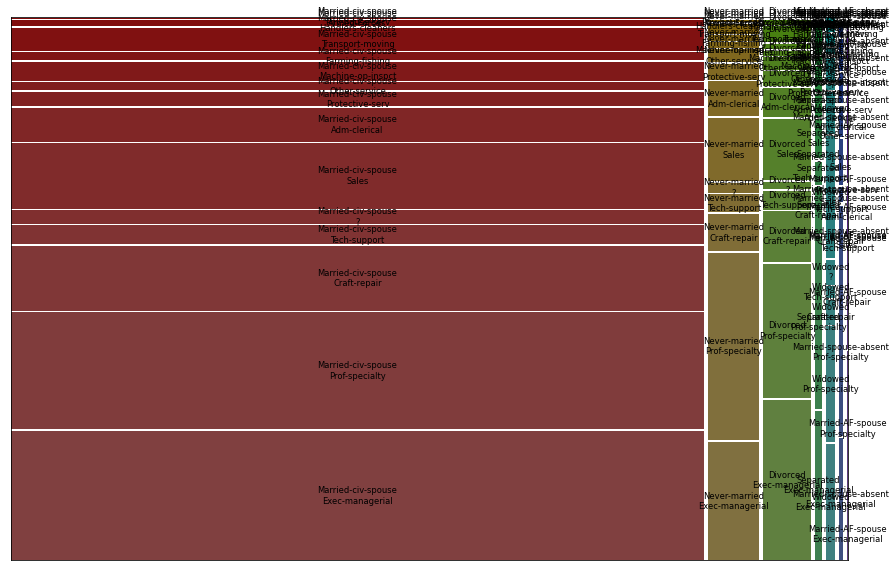

with Range
Salary <=50K
education


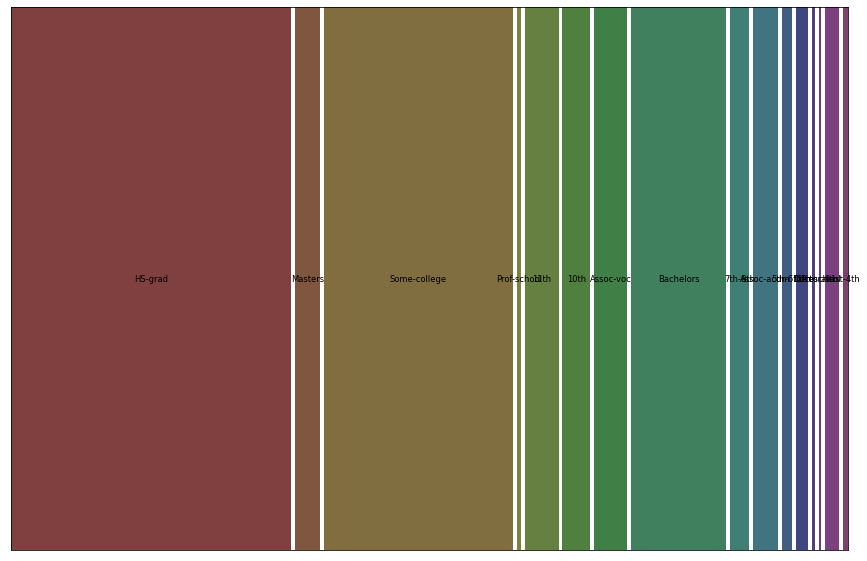

Salary >50K
education


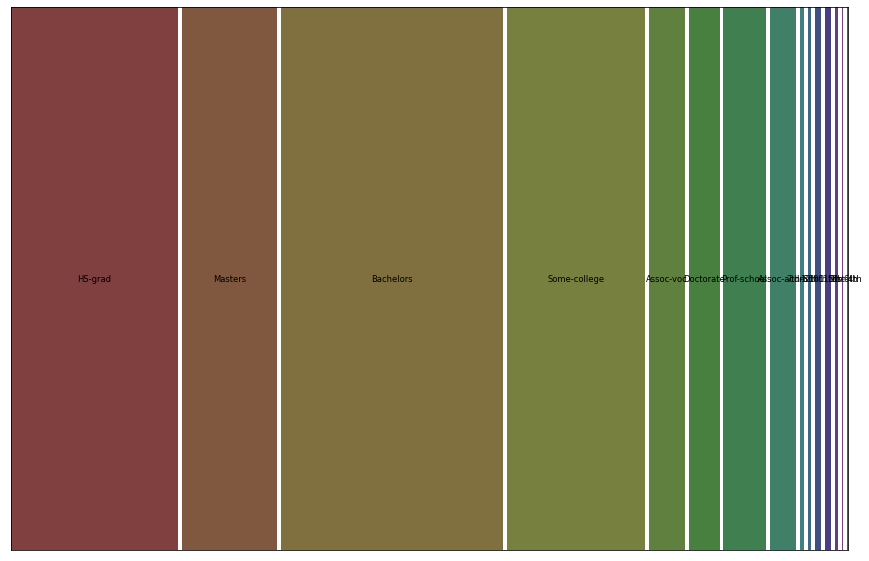

Salary <=50K
marital-status


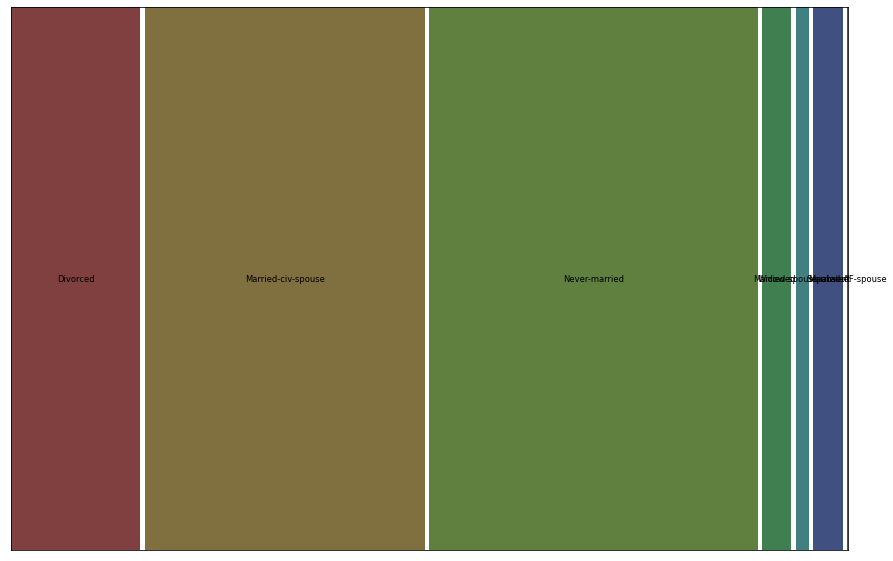

Salary >50K
marital-status


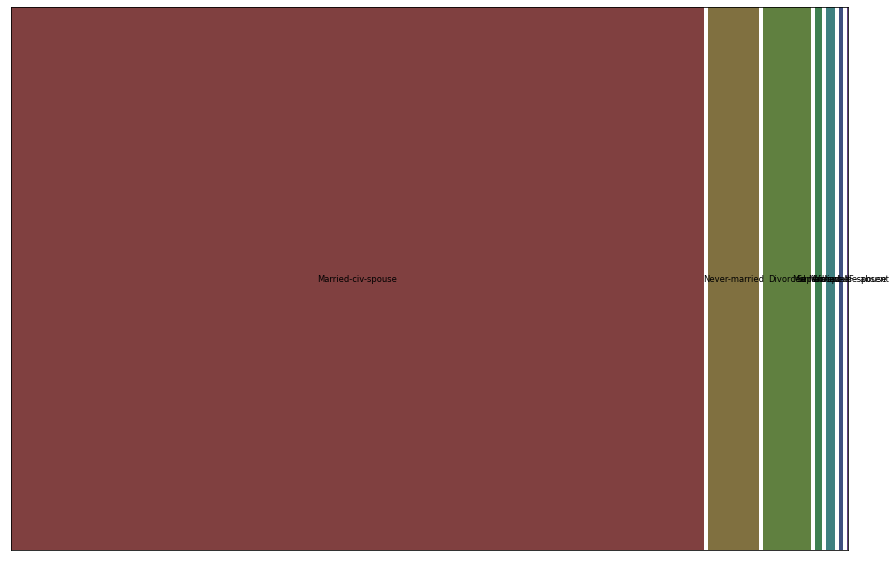

Salary <=50K
occupation


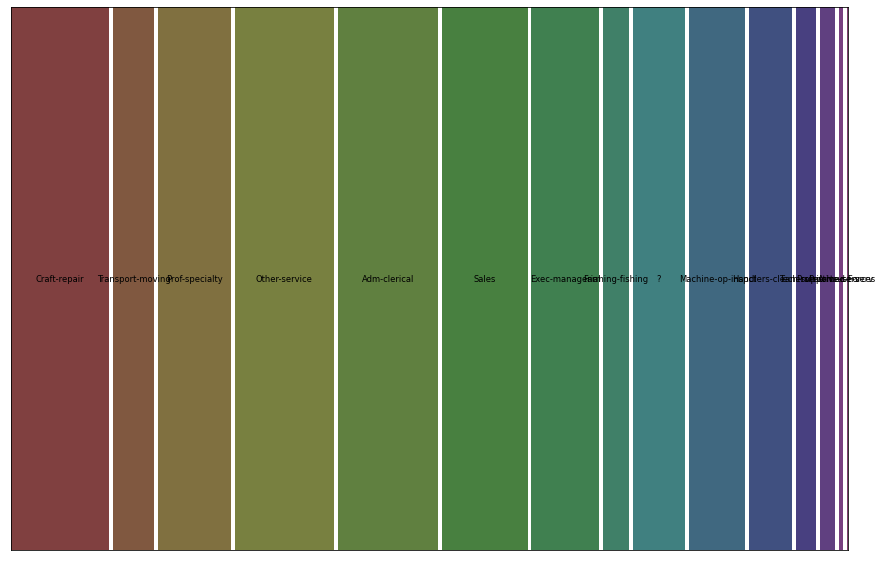

Salary >50K
occupation


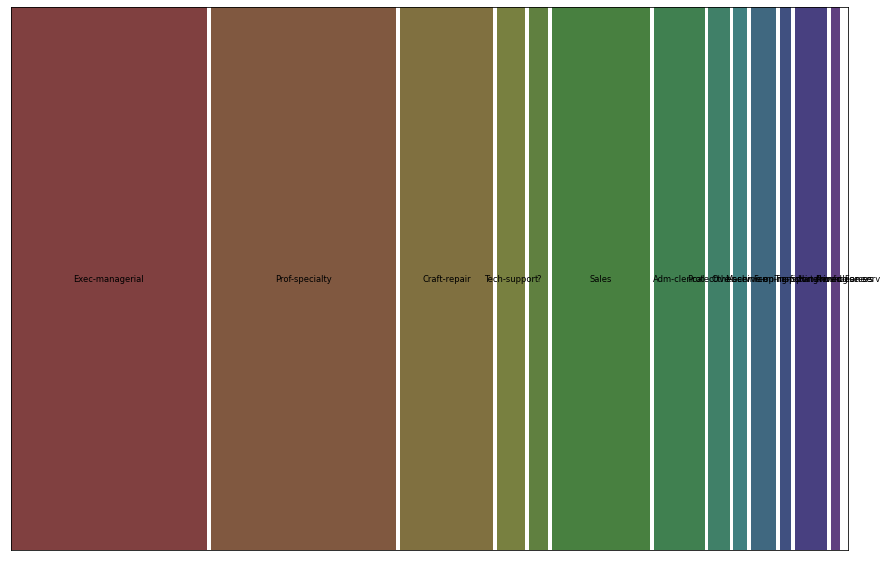

All Sal


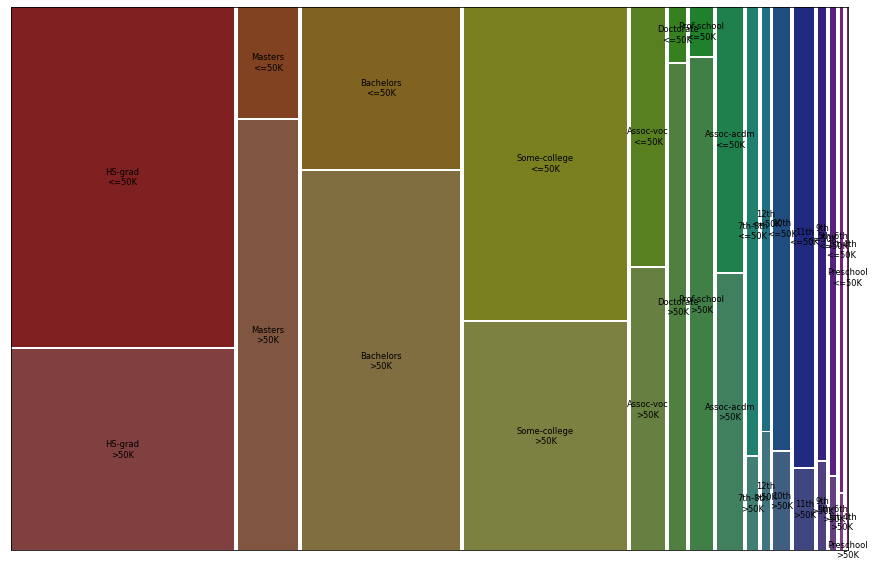

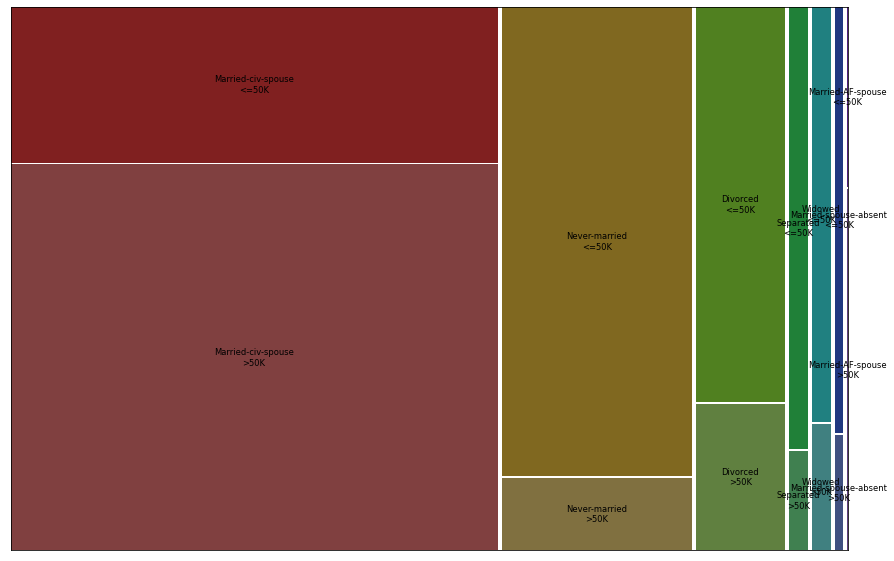

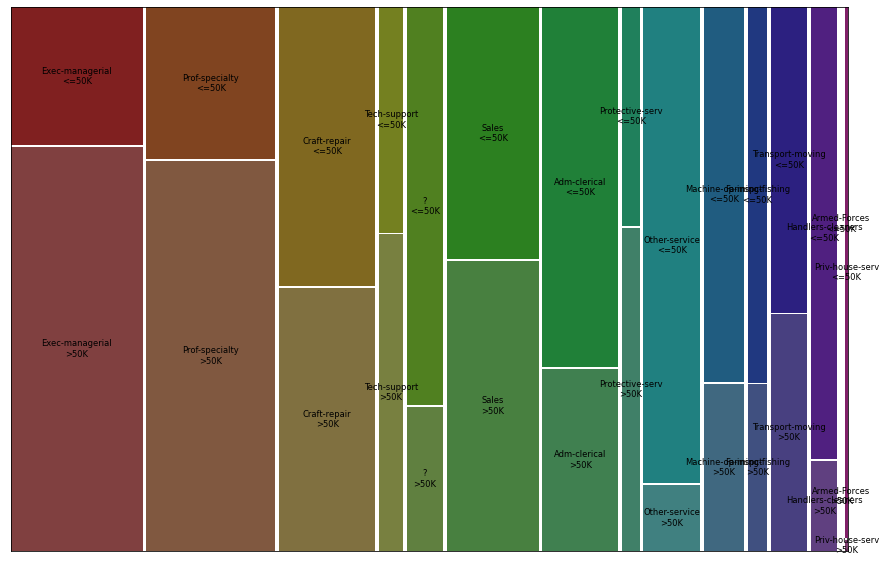

In [28]:
plot_class('education', 'marital-status', 'occupation')

In [30]:
new_df = pd.read_csv("./adult.data", header=None, sep=", ")
new_df.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation",\
                  "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", \
                  "native-country", "class"]
# 

below = new_df[new_df["class"] == "<=50K"]
above = new_df[new_df["class"] == ">50K"]

print("Adults with greater than 50K salary = " + str(len(above.index)))
print("Adults with lesser than or equal to 50K salary  = " + str(len(below.index)))

new_df.head()

C:\Users\Abhilash\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


Adults with greater than 50K salary = 7841
Adults with lesser than or equal to 50K salary  = 24720


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
def ana_cat_dat(column):
    upper = Counter(above[column])
    lower = Counter(below[column])

    print(column)
    print()
    plt.close()
    fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(5,10))
    axes[0].pie(upper.values(), labels=upper.keys(), autopct='%1.0f%%')
    axes[0].set_title(">50K")
    axes[1].pie(lower.values(), labels=lower.keys(), autopct='%1.0f%%')
    axes[1].set_title("<=50K")
    plt.show()
    

In [ ]:
def ana_per_unique(column):
    unique_values = new_df[column].unique()
    plt.close()
    fig, axes = plt.subplots(ncols=1, nrows=len(unique_values), figsize=(5,5 * len(unique_values)))

    for i, val in enumerate(unique_values):
        val_df = new_df[new_df[column] == val]
        upper = val_df[val_df["class"] == ">50K"]
        lower = val_df[val_df["class"] == "<=50K"]
        axes[i].pie([len(lower.index), len(upper.index)], labels=["<=50K (Count-" + str(len(lower.index)) + ")", ">50K (Count-" + str(len(upper.index)) + ")"], autopct='%1.0f%%')
        axes[i].set_title(val)
    
    plt.show()

race



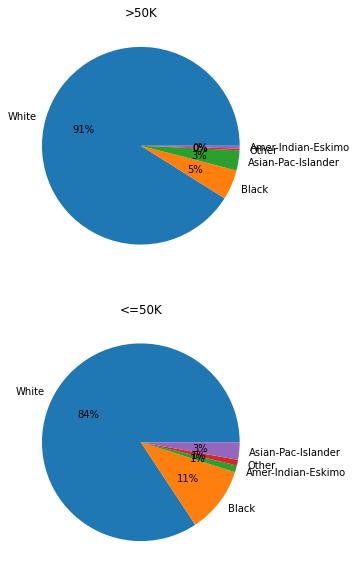

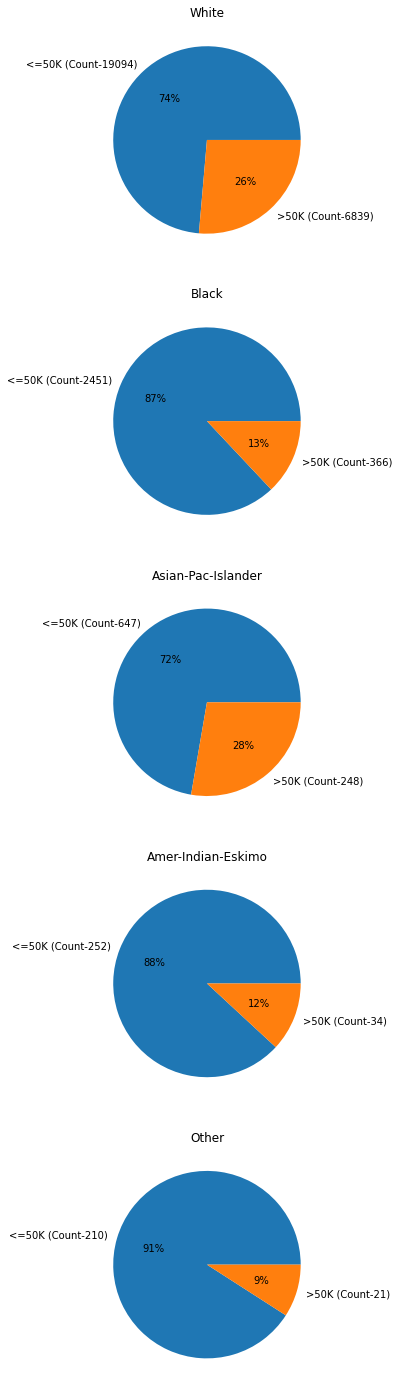

In [11]:
ana_cat_dat("race")
print()
print()
ana_per_unique("race")

marital-status



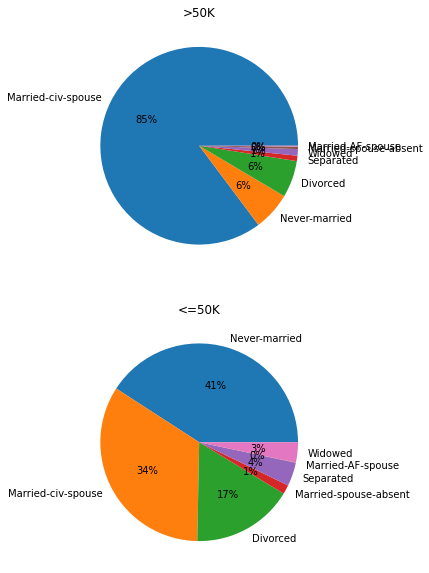

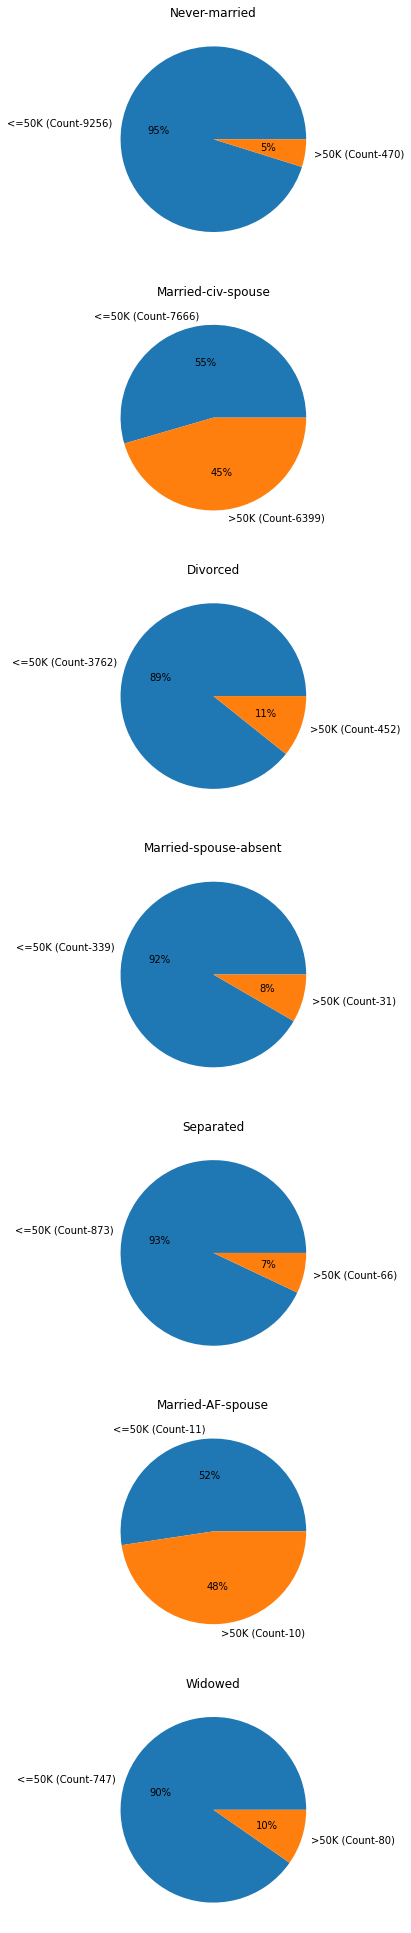

In [12]:
ana_cat_dat("marital-status")
print()
print()
ana_per_unique("marital-status")